In [186]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')




# coffe score


flight_delay_data=pd.read_csv('data/Train.csv')

In [385]:
df[['target','delay']].head(10)

,target,delay
0,260.0,1
1,20.0,1
2,0.0,0
3,0.0,0
4,22.0,1
5,53.0,1
6,10.0,0
7,15.0,0
8,16.0,1
9,21.0,1


In [389]:
pip install imgkit


Note: you may need to restart the kernel to use updated packages.


In [392]:
import imgkit

# Convert the DataFrame to HTML
html = df[['target','delay']].head(10).to_html()

# Write the HTML to a file
with open('df.html', 'w') as f:
    f.write(html)

# Convert the HTML to an image using imgkit
imgkit.from_file('df.html', 'df.jpg')


Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

In [384]:
flight_delay_data[['DEPSTN','cursed']].head(10)

,DEPSTN,cursed
0,CMN,0
1,MXP,0
2,TUN,1
3,DJE,1
4,TUN,1
5,TLS,0
6,TUN,1
7,TUN,1
8,TUN,1
9,TUN,1


In [ ]:
flight_delay_data[['DEPSTN','cursed']].head(10)

In [394]:
# Convert the DataFrame to HTML
html = flight_delay_data[['DEPSTN','cursed']].head(10).to_html()

# Write the HTML to a file
with open('df2.html', 'w') as f:
    f.write(html)

# Convert the HTML to an image using imgkit
imgkit.from_file('df2.html', 'df2.jpg')

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

In [188]:
flight_delay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


ç

In [172]:
flight_delay_data['ARRSTN'].value_counts()

ARRSTN
TUN    42572
DJE    10198
ORY     6755
MIR     5251
MRS     2845
       ...  
ESB        1
LBV        1
MVB        1
OTP        1
TPS        1
Name: count, Length: 128, dtype: int64

In [173]:
flight_delay_data['DEPSTN'].value_counts()

DEPSTN
TUN    42522
DJE    10252
ORY     6755
MIR     5248
MRS     2845
       ...  
ADB        1
SKG        1
OTP        1
KBP        1
CTA        1
Name: count, Length: 132, dtype: int64

# Data cleaningin and feature engineering

In [396]:
flight_delay_data['target'].describe()

count    107756.000000
mean         48.716276
std         117.083017
min           0.000000
25%           0.000000
50%          14.000000
75%          43.000000
max        3451.000000
Name: target, dtype: float64

In [398]:
# Convert the DataFrame to HTML
html = flight_delay_data['target'].describe().to_frame().to_html()

# Write the HTML to a file
with open('df3.html', 'w') as f:
    f.write(html)

# Convert the HTML to an image using imgkit
imgkit.from_file('df3.html', 'df3.jpg')


Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

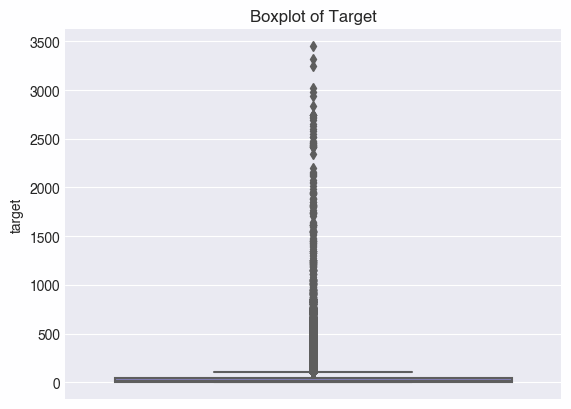

In [372]:
import seaborn as sns

# Create a boxplot for 'target' column
sns.boxplot(y=flight_delay_data['target'])

# Add title
plt.title('Boxplot of Target')

# Display the plot
plt.show()


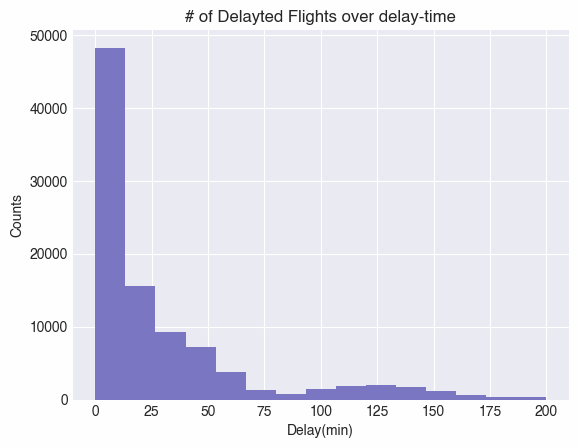

In [427]:
# Histogram with limited range and specified number of bins
plt.hist(flight_delay_data['target'], range=(0, 200), bins=15)

# Add axis labels
plt.xlabel('Delay(min)')
plt.ylabel('Counts')
plt.title('# of Delayted Flights over delay-time')
# Display the histogram
plt.show()


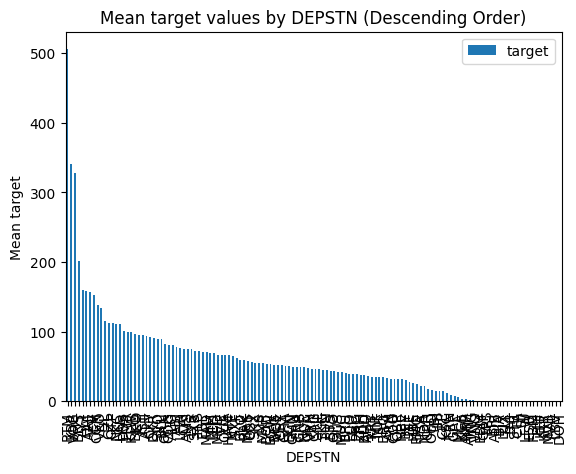

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouped mean values
test = flight_delay_data[['DEPSTN', 'target']].groupby('DEPSTN').mean()

# Sortieren der Werte in absteigender Reihenfolge
test_sorted = test.sort_values(by='target', ascending=False)

# Bar-Plot in absteigender Reihenfolge der Mittelwerte
test_sorted.plot(kind='bar')

# Anpassung des Plots
plt.xlabel('DEPSTN')
plt.ylabel('Mean target')
plt.title('Mean target values by DEPSTN (Descending Order)')

# Anzeige des Plots
plt.show()


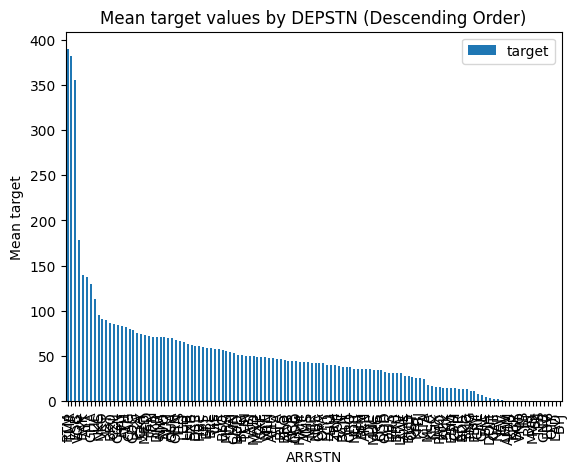

In [181]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouped mean values
test = flight_delay_data[['ARRSTN', 'target']].groupby('ARRSTN').mean()

# Sortieren der Werte in absteigender Reihenfolge
test_sorted = test.sort_values(by='target', ascending=False)

# Bar-Plot in absteigender Reihenfolge der Mittelwerte
test_sorted.plot(kind='bar')

# Anpassung des Plots
plt.xlabel('ARRSTN')
plt.ylabel('Mean target')
plt.title('Mean target values by DEPSTN (Descending Order)')

# Anzeige des Plots
plt.show()

In [238]:
flight_delay_data['flight_delay_data'] = pd.to_datetime(flight_delay_data['DATOP'])

# Extrahiere den Monat und weise ihn der neuen Spalte "month" zu
flight_delay_data['month'] = flight_delay_data['flight_delay_data'].dt.month

<Axes: xlabel='month'>

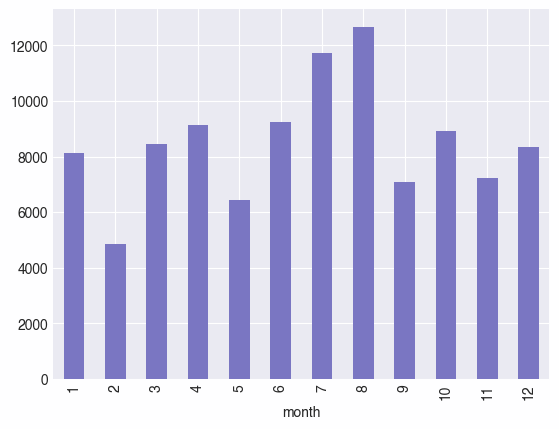

In [428]:
flight_delay_data['month'].value_counts().sort_index().plot(kind="bar")


In [194]:
import pandas as pd



# Verwendung von replace(), um die Spalte "delay" basierend auf "target" zu setzen
flight_delay_data['delay'] = np.where(flight_delay_data['target'] > 15, 1, 0)





,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,delay
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,1
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,1


In [ ]:
flight_delay_data['STD_day'] = flight_delay_data['STD'].dt.dayofweek + 1  # +1 to make it 1-7 instead of 0-6
flight_delay_data['STA_day'] = flight_delay_data['STA'].dt.dayofweek + 1  # +1 to make it 1-7 instead of 0-6

flight_delay_data['STD_hour'] = flight_delay_data['STD'].dt.hour + 1  # +1 to make it 1-24 instead of 0-23
flight_delay_data['STA_hour'] = flight_delay_data['STA'].dt.hour + 1  # +1 to make it 1-24 instead of 0-23


AttributeError: Can only use .dt accessor with datetimelike values

In [253]:
# Check for NaNs in 'STD' and 'STA' columns
print(flight_delay_data['STD'].isnull().sum())
print(flight_delay_data['STA'].isnull().sum())

# Drop rows with NaNs in 'STD' and 'STA' columns
flight_delay_data = flight_delay_data.dropna(subset=['STD', 'STA'])




flight_delay_data['STD'] = pd.to_datetime(flight_delay_data['STD'])
flight_delay_data['STA'] = pd.to_datetime(flight_delay_data['STA'])

flight_delay_data['STD_day'] = flight_delay_data['STD'].dt.dayofweek + 1
flight_delay_data['STA_day'] = flight_delay_data['STA'].dt.dayofweek + 1

flight_delay_data['STD_hour'] = flight_delay_data['STD'].dt.hour + 1
flight_delay_data['STA_hour'] = flight_delay_data['STA'].dt.hour + 1



0
0


In [ ]:
50000/108000

0.46296296296296297

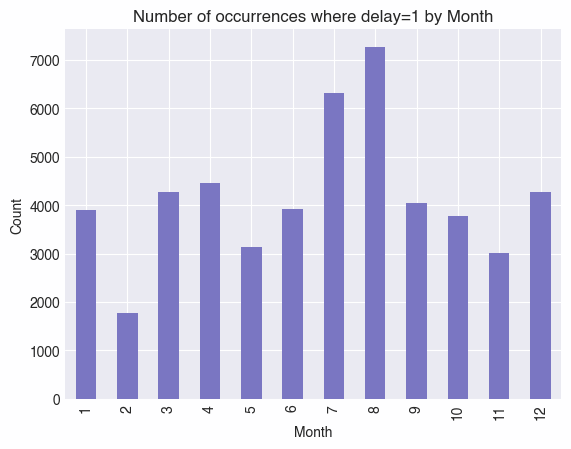

In [429]:
# Anzahl der Zeilen mit delay=1 zählen und Balkendiagramm erstellen
flight_delay_data[flight_delay_data['delay'] == 1]['month'].value_counts().sort_index().plot(kind="bar")

# Achsenbeschriftungen hinzufügen
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of occurrences where delay=1 by Month')

# Anzeige des Plots
plt.show()

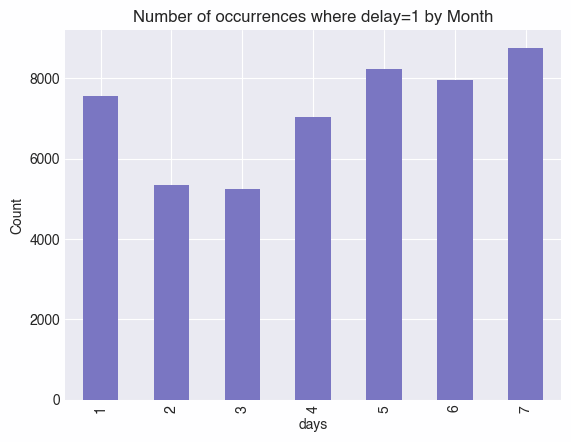

In [430]:
# Anzahl der Zeilen mit delay=1 zählen und Balkendiagramm erstellen
flight_delay_data[flight_delay_data['delay'] == 1]['STD_day'].value_counts().sort_index().plot(kind="bar")

# Achsenbeschriftungen hinzufügen
plt.xlabel('days')
plt.ylabel('Count')
plt.title('Number of occurrences where delay=1 by Month')

# Anzeige des Plots
plt.show()

In [431]:
airports = ["TUN", "DJE", "MIR"]

flight_delay_data['cursed'] = np.where(flight_delay_data['DEPSTN'].isin(airports), 1, 0)

In [209]:
flight_delay_data['cursed1'] = np.where((flight_delay_data['DEPSTN'] == "TUN") | (flight_delay_data['ARRST'] == "TUN"), 1, 0)


In [212]:

flight_delay_data['cursed1'] = np.where(flight_delay_data['DEPSTN'] == "TUN" , 1, 0)

In [418]:
len(flight_delay_data[(flight_delay_data['DEPSTN'] == flight_delay_data['ARRSTN']) & (flight_delay_data['target'] > 0)])


281

In [432]:
flight_delay_data[(flight_delay_data['DEPSTN'] == flight_delay_data['ARRSTN']) ].shape[0]


0

In [425]:
flight_delay_data = flight_delay_data[flight_delay_data['DEPSTN'] != flight_delay_data['ARRSTN']]


In [433]:
flight_delay_data[flight_delay_data['delay'] == 0]['DEPSTN'].value_counts().sort_values(ascending=False).head(10)


DEPSTN
TUN    17971
DJE     7373
MIR     3589
ORY     2675
MRS     1296
NCE     1187
TOE      965
LYS      842
CMN      840
FCO      801
Name: count, dtype: int64

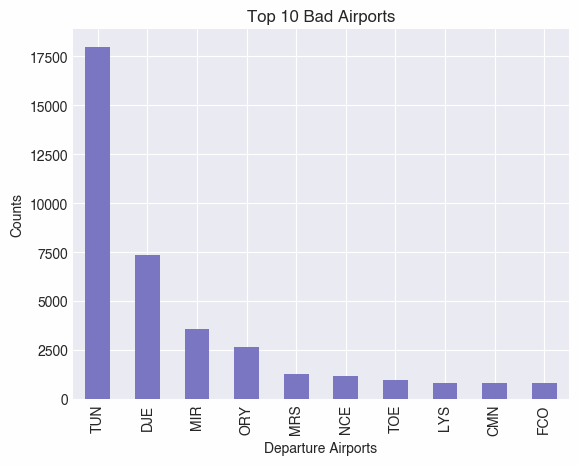

In [434]:
# Daten erfassen
daten_zum_plotten = flight_delay_data[flight_delay_data['delay'] == 0]['DEPSTN'].value_counts().sort_values(ascending=False).head(10)

# Balkendiagramm plotten
daten_zum_plotten.plot(kind='bar')

# Titel und Beschriftungen hinzufügen
plt.title('Top 10 Bad Airports')
plt.xlabel('Departure Airports')
plt.ylabel('Counts')

# Diagramm anzeigen
plt.show()


In [331]:
# Flughäfen mit Verspätungen
delayed_airports = flight_delay_data[flight_delay_data['delay'] == 1]['DEPSTN'].value_counts().sort_values(ascending=False)

# Flughäfen ohne Verspätungen
non_delayed_airports = flight_delay_data[flight_delay_data['delay'] == 0]['DEPSTN'].value_counts().sort_values(ascending=False)

# Berechnung des Verhältnisses
ratio = delayed_airports / (delayed_airports + non_delayed_airports)

# Hinzufügen der neuen Spalte "ratio" zum DataFrame
flight_delay_data['ratio'] = flight_delay_data['DEPSTN'].map(ratio)


In [ ]:
flight_delay_data = flight_delay_data.dropna(subset=['ratio'])


In [281]:
nan_rows = flight_delay_data[flight_delay_data['ratio'].isna()]
nan_rows

KeyError: 'ratio'

In [ ]:
flight_delay_data['ratio'].isna()


0         False
1         False
2         False
3         False
4         False
          ...  
107828    False
107829    False
107830    False
107831    False
107832    False
Name: ratio, Length: 107833, dtype: bool

In [ ]:
sorted_data = flight_delay_data[flight_delay_data['delay'] == 1]['DEPSTN'].value_counts().sort_values(ascending=False)
sorted_data


DEPSTN
TUN    20345
ORY     4056
DJE     2286
MRS     1540
LYS     1509
       ...  
GHA        1
KTW        1
PSA        1
KBP        1
EBM        1
Name: count, Length: 107, dtype: int64

In [ ]:
sorted_data = flight_delay_data[flight_delay_data['delay'] == 1].groupby('DEPSTN').agg({'ratio': 'first', 'delay': 'count'}).sort_values('delay', ascending=False)
sorted_data.head(15)



,ratio,delay
DEPSTN,,
TUN,0.478458,20345
ORY,0.600444,4056
DJE,0.222981,2286
MRS,0.541301,1540
LYS,0.639949,1509
MIR,0.248285,1303
ALG,0.659886,1038
NCE,0.465649,1037
JED,0.760105,865


In [ ]:
flight_delay_data[(flight_delay_data['delay'] == 1) & (flight_delay_data['DEPSTN'] == "TUN")]['ARRSTN'].unique()


array(['ALG', 'FCO', 'NCE', 'ORY', 'FRA', 'MED', 'DJE', 'CMN', 'MRS',
       'LYS', 'GVA', 'BEG', 'MLA', 'SFA', 'JED', 'CAI', 'ABJ', 'BCN',
       'HAM', 'BRU', 'NDR', 'MXP', 'VCE', 'SXB', 'IST', 'MUC', 'ORN',
       'VIE', 'BLQ', 'LHR', 'BOD', 'TUN', 'CDG', 'BEY', 'TLS', 'DUS',
       'NKC', 'BKO', 'MIR', 'NTE', 'TOE', 'LIS', 'OUA', 'MAD', 'AMS',
       'YUL', 'DKR', 'NIM', 'SVO', 'LGW', 'LIL', 'EBL', 'ZRH', 'CGN',
       'AYT', 'SXF', 'NAP', 'CPH', 'KRT', 'OST', 'PRG', 'ARN', 'TBJ',
       'NBE', 'GAE', 'OUD', 'PMO', 'ESB', 'CZL', 'CKY', 'BTS', 'HBE',
       'DSS', 'COO', 'BUD', 'FIH', 'CAG', 'EBM', 'VKO', 'AAE', 'CTA',
       'BRQ', 'OPO', 'VOG', 'RTM'], dtype=object)

In [435]:
flight_delay_data[(flight_delay_data['delay'] == 1) & (flight_delay_data['DEPSTN'] == "TUN")]['ARRSTN'].value_counts().head(15)


ARRSTN
ORY    2825
MRS    1383
ALG    1026
IST     916
LYS     841
NCE     798
MXP     761
CMN     713
JED     644
TLS     564
FCO     515
GVA     497
DJE     477
FRA     397
MED     392
Name: count, dtype: int64

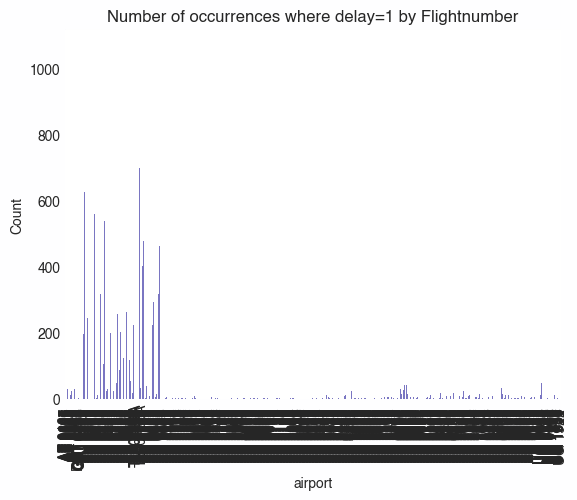

In [436]:
# Anzahl der Zeilen mit delay=1 zählen und Balkendiagramm erstellen
flight_delay_data[flight_delay_data['delay'] == 1]['FLTID'].value_counts().sort_index().plot(kind="bar")

# Achsenbeschriftungen hinzufügen
plt.xlabel('airport')
plt.ylabel('Count')
plt.title('Number of occurrences where delay=1 by Flightnumber')

# Anzeige des Plots
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Assume df is your DataFrame
df = flight_delay_data

# Select feature columns
feature_cols = ['month', 'ratio']
#feature_cols = ['month']

# Create X (features) and y (response)
X = df[feature_cols]
y = df['delay']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate model
logreg = LogisticRegression()

# Fit model to training data
logreg.fit(X_train, y_train)

# Make predictions on test data
y_pred = logreg.predict(X_test)

# Compute and print Accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the Confusion Matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))



Accuracy:  0.6017669549723449
Confusion Matrix: 
 [[11175  3136]
 [ 7592  5036]]


In [437]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Assume df is your DataFrame
df = flight_delay_data

# Select feature columns
#feature_cols = ['month', 'ratio']
#feature_cols = ['month']
feature_cols = ['cursed']

# Create X (features) and y (response)
X = df[feature_cols]
y = df['delay']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate model
logreg = LogisticRegression()

# Fit model to training data
logreg.fit(X_train, y_train)

# Make predictions on test data
y_pred = logreg.predict(X_test)

# Compute and print Accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the Confusion Matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  0.5376970930005086
Confusion Matrix: 
 [[7221 5860]
 [5956 6522]]


In [192]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Assume df is your DataFrame
df = flight_delay_data

# Convert categorical variables into numerical using one-hot encoding
#cat_features = ['FLTID', 'DEPSTN', 'ARRSTN', 'STATUS']
cat_features = ['DEPSTN', 'ARRSTN']
df = pd.get_dummies(df, columns = cat_features)
#df = df.astype(int)

# Select feature columns
#feature_cols = ['month', 'ratio']
feature_cols = cat_features
#feature_cols = ['month']

# Create X (features) and y (response)
X = df[feature_cols]
y = df['delay']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate model
logreg = LogisticRegression()

# Fit model to training data
logreg.fit(X_train, y_train)

# Make predictions on test data
y_pred = logreg.predict(X_test)

# Compute and print Accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the Confusion Matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
# Compute and print RMSE
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))

KeyError: "None of [Index(['DEPSTN'], dtype='object')] are in the [columns]"

In [438]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# Assume df is your DataFrame
df = flight_delay_data

# Convert categorical variables into numerical using one-hot encoding
cat_features = ['DEPSTN', 'ARRSTN']
df = pd.get_dummies(df, columns = cat_features)

# Get a list of all the one-hot-encoded columns
one_hot_cols = [col for col in df.columns if 'DEPSTN' in col or 'ARRSTN' in col]

# Select feature columns
feature_cols = one_hot_cols

# Create X (features) and y (response)
X = df[feature_cols]
y = df['target']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate model
logreg = LogisticRegression()

# Fit model to training data
logreg.fit(X_train, y_train)

# Make predictions on test data
y_pred = logreg.predict(X_test)

# Compute and print RMSE
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))


KeyboardInterrupt: 

In [443]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Assume df is your DataFrame
df = flight_delay_data

# Convert categorical variables into numerical using one-hot encoding
cat_features = ['DEPSTN', 'ARRSTN']
df = pd.get_dummies(df, columns = cat_features)

# Get a list of all the one-hot-encoded columns
one_hot_cols = [col for col in df.columns if 'DEPSTN' in col or 'ARRSTN' in col]

# Select feature columns
feature_cols = one_hot_cols

feature_cols.append('month')
feature_cols.append('STD_day')
feature_cols.append('STD_hour')

# Create X (features) and y (response)
X = df[feature_cols]
y = df['delay']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

# Instantiate model
logreg = LogisticRegression(max_iter=1000) # Increase max_iter if the model doesn't converge

# Fit model to training data
logreg.fit(X_train, y_train)

# Make predictions on test data
y_pred = logreg.predict(X_test)

# Compute and print Accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the Confusion Matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


Accuracy:  0.6621509267863256
Confusion Matrix: 
 [[6499 3988]
 [2920 7040]]


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Assume df is your DataFrame
df = flight_delay_data

# Convert categorical variables into numerical using one-hot encoding
cat_features = ['DEPSTN', 'ARRSTN']
df = pd.get_dummies(df, columns = cat_features)

# Get a list of all the one-hot-encoded columns
one_hot_cols = [col for col in df.columns if 'DEPSTN' in col or 'ARRSTN' in col]

# Select feature columns
feature_cols = one_hot_cols

feature_cols.append('month')
feature_cols.append('STD_day')
feature_cols.append('STD_hour')

# Create X (features) and y (response)
X = df[feature_cols]
y = df['delay']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

# Instantiate model
logreg = LogisticRegression(max_iter=1000) # Increase max_iter if the model doesn't converge

# Fit model to training data
logreg.fit(X_train, y_train)

# Make predictions on test data
y_pred = logreg.predict(X_test)

# Compute and print Accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the Confusion Matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

In [328]:
df.head(2)

,ID,DATOP,FLTID,STD,STA,STATUS,AC,target,delay,cursed,...,ARRSTN_TRN,ARRSTN_TUN,ARRSTN_VCE,ARRSTN_VIE,ARRSTN_VKO,ARRSTN_VNO,ARRSTN_VOG,ARRSTN_VRN,ARRSTN_YUL,ARRSTN_ZRH
0,train_id_0,2016-01-03,TU 0712,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,1,0,...,False,True,False,False,False,False,False,False,False,False
1,train_id_1,2016-01-13,TU 0757,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,1,0,...,False,True,False,False,False,False,False,False,False,False


In [334]:
flight_delay_data = flight_delay_data.dropna(subset=['ratio'])

In [446]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Assume df is your DataFrame
df = flight_delay_data

# Convert categorical variables into numerical using one-hot encoding
cat_features = ['DEPSTN', 'ARRSTN']
df = pd.get_dummies(df, columns = cat_features)

# Get a list of all the one-hot-encoded columns
one_hot_cols = [col for col in df.columns if 'DEPSTN' in col or 'ARRSTN' in col]

# Select feature columns
feature_cols = one_hot_cols


feature_cols.append('month')
feature_cols.append('STD_day')
feature_cols.append('STD_hour')
#feature_cols.append('ratio')



# Create X (features) and y (response)
X = df[feature_cols]
y = df['delay']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

# Instantiate model
dec_tree = DecisionTreeClassifier() # Increase max_iter if the model doesn't converge

# Fit model to training data
dec_tree.fit(X_train, y_train)

# Make predictions on test data
y_pred = dec_tree.predict(X_test)

# Compute and print Accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the Confusion Matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  0.6788770968846286
Confusion Matrix: 
 [[7514 2973]
 [3593 6367]]


In [413]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Assume df is your DataFrame
df = flight_delay_data

# Convert categorical variables into numerical using one-hot encoding
cat_features = ['DEPSTN', 'ARRSTN']
df = pd.get_dummies(df, columns = cat_features)

# Get a list of all the one-hot-encoded columns
one_hot_cols = [col for col in df.columns if 'DEPSTN' in col or 'ARRSTN' in col]

# Select feature columns
feature_cols = one_hot_cols



#feature_cols.append('ratio')



# Create X (features) and y (response)
X = df[feature_cols]
y = df['delay']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

# Instantiate model
dec_tree = DecisionTreeClassifier() # Increase max_iter if the model doesn't converge

# Fit model to training data
dec_tree.fit(X_train, y_train)

# Make predictions on test data
y_pred = dec_tree.predict(X_test)

# Compute and print Accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the Confusion Matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  0.6797048997772829
Confusion Matrix: 
 [[6885 4561]
 [2342 7764]]


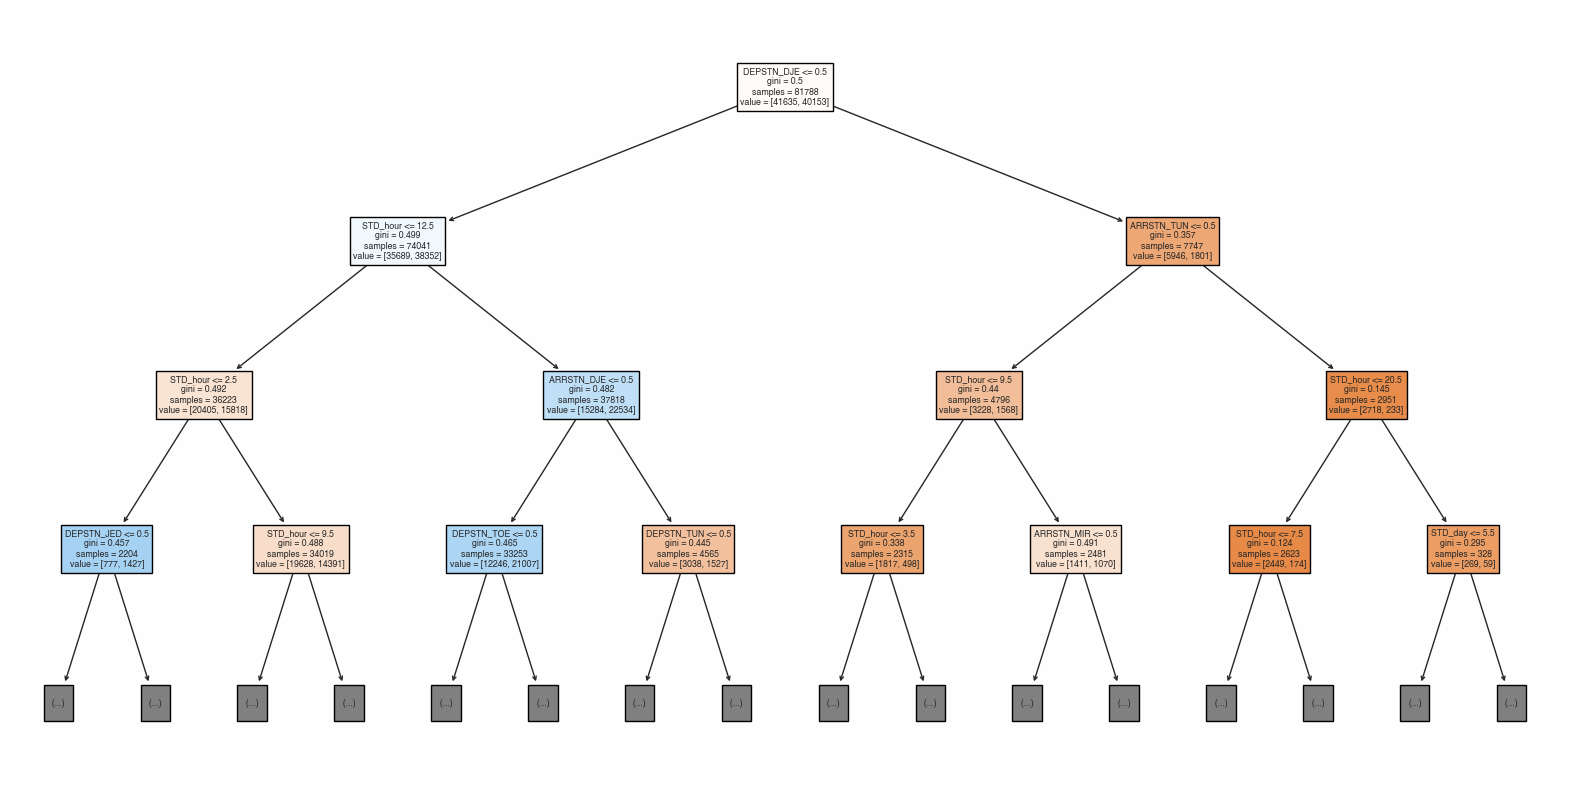

In [447]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dec_tree, filled=True, feature_names=X.columns, max_depth=3)
plt.show()

In [350]:
## important features,
feature_importance_df= pd.DataFrame(xgboostmodel.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(20,12));
sns.barplot(x='importance', y='feature', data=feature_importance_df.sort_values(by = ['importance'], ascending=False).head(10))
plt.title('XGBoost Regressor features importance(top 10)')

NameError: name 'xgboostmodel' is not defined

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dec_tree, filled=True, feature_names=X.columns, max_depth=3)
plt.show()

In [304]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Assume df is your DataFrame
df = flight_delay_data

# Convert categorical variables into numerical using one-hot encoding
cat_features = ['DEPSTN', 'ARRSTN']
df = pd.get_dummies(df, columns = cat_features)

# Get a list of all the one-hot-encoded columns
one_hot_cols = [col for col in df.columns if 'DEPSTN' in col or 'ARRSTN' in col]

# Select feature columns
feature_cols = one_hot_cols


feature_cols.append('month')
feature_cols.append('STD_day')
feature_cols.append('STD_hour')

# Create X (features) and y (response)
X = df[feature_cols]
y = df['delay']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

# Instantiate model
dec_tree = DecisionTreeRegressor() # Increase max_iter if the model doesn't converge

# Fit model to training data
dec_tree.fit(X_train, y_train)

# Make predictions on test data
y_pred = dec_tree.predict(X_test)

# Compute and print Accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the Confusion Matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

NameError: name 'DecisionTreeRegressor' is not defined

0         1
1         1
2         0
3         0
4         1
         ..
107828    0
107829    0
107830    0
107831    0
107832    0
Name: delay, Length: 107833, dtype: int64

In [323]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
y = df['target']

# Assume X and y are your features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate model
dec_tree = DecisionTreeRegressor(random_state=42)

# Fit model to training data
dec_tree.fit(X_train, y_train)

# Make predictions on test data
y_pred = dec_tree.predict(X_test)

# Compute and print RMSE
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))


RMSE:  129.5149008983663


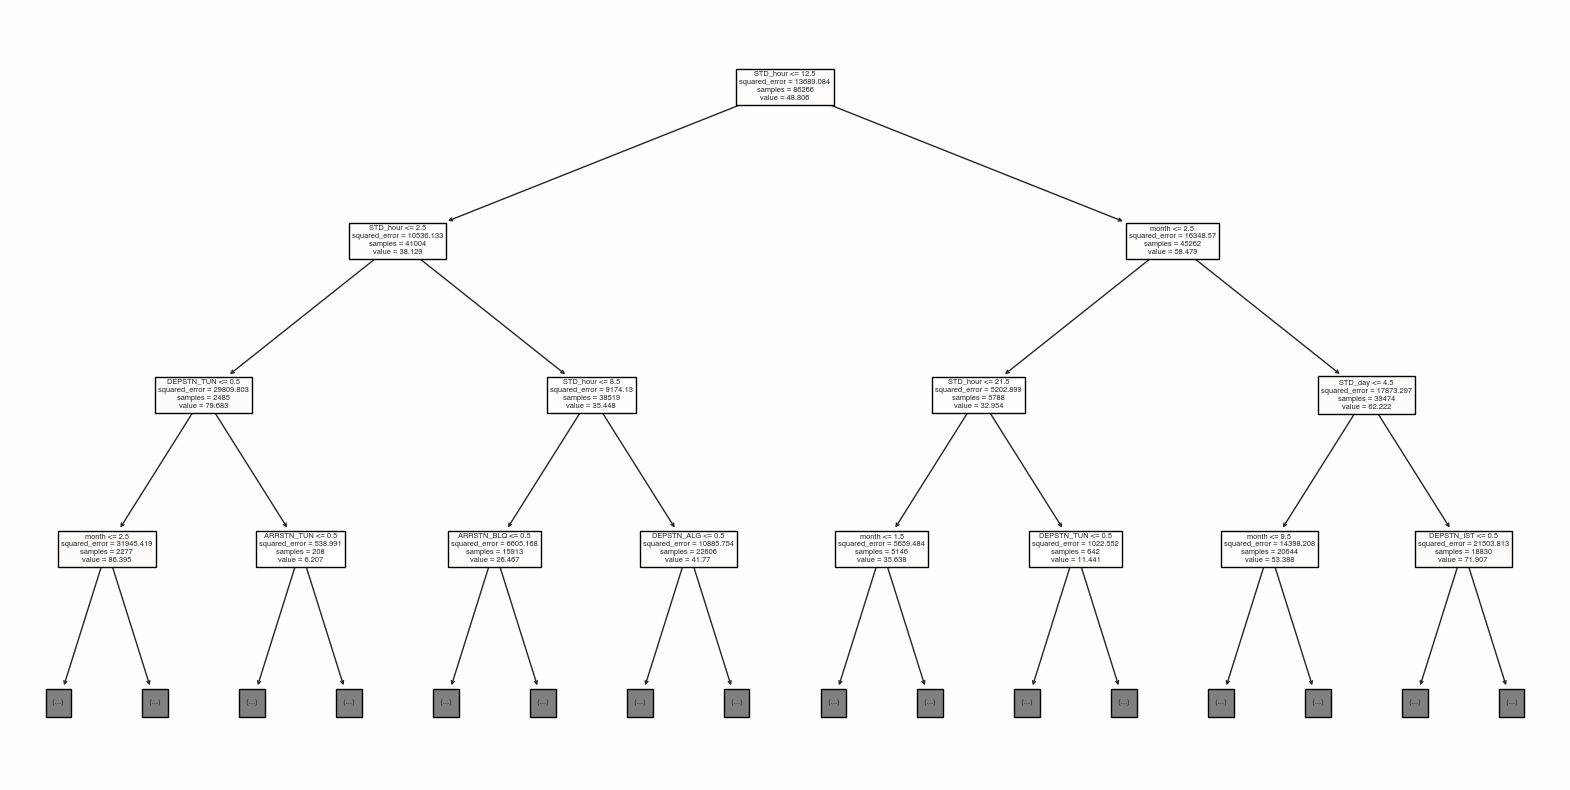

In [325]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dec_tree, filled=True, feature_names=X.columns, max_depth=3)
plt.show()

In [306]:
X_train

,DEPSTN_AAE,DEPSTN_AAL,DEPSTN_ABJ,DEPSTN_ADB,DEPSTN_AHU,DEPSTN_ALG,DEPSTN_AMM,DEPSTN_AMS,DEPSTN_ARN,DEPSTN_ATH,...,ARRSTN_VIE,ARRSTN_VKO,ARRSTN_VNO,ARRSTN_VOG,ARRSTN_VRN,ARRSTN_YUL,ARRSTN_ZRH,month,STD_day,STD_hour
30962,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,11,4,16
34625,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,6,6,17
76736,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,6,7,17
52580,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,8,5,1
97130,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,12,7,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54886,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,12,7,7
76820,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,5,5,13
103694,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,7,7,17
860,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1,7,17


In [278]:
flight_delay_data.head(2)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,delay,cursed,cursed1,flight_delay_data,month,STD_day,STA_day,STD_hour,STA_hour
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,1,0,0,2016-01-03,1,7,7,11,13
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,1,0,0,2016-01-13,1,3,3,16,17


In [448]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Assume df is your DataFrame
df = flight_delay_data

# Convert categorical variables into numerical using one-hot encoding
cat_features = ['DEPSTN', 'ARRSTN']
df = pd.get_dummies(df, columns = cat_features)

# Get a list of all the one-hot-encoded columns
one_hot_cols = [col for col in df.columns if 'DEPSTN' in col or 'ARRSTN' in col]

# Select feature columns
feature_cols = one_hot_cols

feature_cols.append('month')
feature_cols.append('STD_day')
feature_cols.append('STD_hour')

# Create X (features) and y (response)
X = df[feature_cols]
y = df['delay']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

# Instantiate model
rf_forest = RandomForestClassifier() # Increase max_iter if the model doesn't converge

# Fit model to training data
rf_forest.fit(X_train, y_train)

# Make predictions on test data
y_pred = rf_forest.predict(X_test)

# Compute and print Accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the Confusion Matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  0.6851860908690761
Confusion Matrix: 
 [[7180 3307]
 [3130 6830]]


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Assume df is your DataFrame
df = flight_delay_data

# Convert categorical variables into numerical using one-hot encoding
cat_features = ['DEPSTN', 'ARRSTN']
df = pd.get_dummies(df, columns = cat_features)

# Get a list of all the one-hot-encoded columns
one_hot_cols = [col for col in df.columns if 'DEPSTN' in col or 'ARRSTN' in col]

# Select feature columns
feature_cols = one_hot_cols

feature_cols.append('month')
feature_cols.append('STD_day')
feature_cols.append('STD_hour')

# Create X (features) and y (response)
X = df[feature_cols]
y = df['delay']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

# Instantiate model
rf_forest = RandomForestClassifier() # Increase max_iter if the model doesn't converge

# Fit model to training data
rf_forest.fit(X_train, y_train)

# Make predictions on test data
y_pred = rf_forest.predict(X_test)

# Compute and print Accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the Confusion Matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Assume df is your DataFrame
df = flight_delay_data

# Convert categorical variables into numerical using one-hot encoding
cat_features = ['DEPSTN', 'ARRSTN']
df = pd.get_dummies(df, columns = cat_features)

# Get a list of all the one-hot-encoded columns
one_hot_cols = [col for col in df.columns if 'DEPSTN' in col or 'ARRSTN' in col]

# Select feature columns
feature_cols = one_hot_cols

feature_cols.append('month')
feature_cols.append('STD_day')
feature_cols.append('STD_hour')

# Create X (features) and y (response)
X = df[feature_cols]
y = df['delay']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

# Instantiate model
rf_forest = RandomForestClassifier() # Increase max_iter if the model doesn't converge

# Fit model to training data
rf_forest.fit(X_train, y_train)

# Make predictions on test data
y_pred = rf_forest.predict(X_test)

# Compute and print Accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the Confusion Matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

In [298]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assume df is your DataFrame
df = flight_delay_data

# Convert categorical variables into numerical using one-hot encoding
cat_features = ['DEPSTN', 'ARRSTN']
df = pd.get_dummies(df, columns = cat_features)

# Get a list of all the one-hot-encoded columns
one_hot_cols = [col for col in df.columns if 'DEPSTN' in col or 'ARRSTN' in col]

# Select feature columns
feature_cols = one_hot_cols

feature_cols.append('month')
feature_cols.append('STD_day')
feature_cols.append('STD_hour')


# Create X (features) and y (response)
X = df[feature_cols]
y = df['target']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

# Instantiate model
rf_regressor = RandomForestRegressor(random_state=42)

# Fit model to training data
rf_regressor.fit(X_train, y_train)

# Make predictions on test data
y_pred = rf_regressor.predict(X_test)

# Compute and print RMSE
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))


RMSE:  122.63324822326517


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assume df is your DataFrame
df = flight_delay_data

# Select feature columns
feature_cols = ['ratio']

# Create X (features) and y (response)
X = df[feature_cols]
y = df['target']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate model
lr = LinearRegression()

# Fit model to training data
lr.fit(X_train, y_train)

# Make predictions on test data
y_pred = lr.predict(X_test)

# Compute and print RMSE
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))


RMSE:  116.82540173990319


In [ ]:
y_pred

array([46.12470742, 49.05850757, 51.99230771, ..., 49.7919576 ,
       51.25885767, 51.99230771])

In [295]:
flight_delay_data.head(2)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,delay,cursed,cursed1,flight_delay_data,month,STD_day,STA_day,STD_hour,STA_hour
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,1,0,0,2016-01-03,1,7,7,11,13
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,1,0,0,2016-01-13,1,3,3,16,17


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assume df is your DataFrame
df = flight_delay_data

# Select feature columns
feature_cols = ['ratio']

# Create X (features) and y (response)
X = df[feature_cols]
y = df['target']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate model
lr = LinearRegression()

# Fit model to training data
lr.fit(X_train, y_train)

# Make predictions on test data
y_pred = lr.predict(X_test)

# Compute and print RMSE
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

In [270]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

RSEED=42

In [449]:
# Implementation of Stacking in Scikit-Learn
from sklearn.ensemble import StackingClassifier

estimators = [
    ('dt', DecisionTreeClassifier(random_state = RSEED)),
    ('knn', LogisticRegression()),
    ('rf', RandomForestClassifier(random_state = RSEED))
]

clf = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())
clf.fit(X_train, y_train).score(X_test, y_test)

0.6936469897784516

In [307]:
# Import necessary libraries
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Define your base estimators
estimators = [
    ('dt', DecisionTreeRegressor(random_state = RSEED)),
    ('lr', LogisticRegression()),
    ('rf', RandomForestRegressor(random_state = RSEED))
]

# Define the stacking regressor
reg = StackingRegressor(estimators = estimators, final_estimator = LinearRegression())

# Fit the stacking regressor to the training data and evaluate on the test data
reg.fit(X_train, y_train).score(X_test, y_test)


0.2110280216634992

In [308]:
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))

RMSE:  0.4759906092751438


In [311]:
# Import necessary libraries
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Define your base estimators
estimators = [
    ('xgb', XGBRegressor(random_state = RSEED)),
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(random_state = RSEED))
]

# Define the stacking regressor
reg = StackingRegressor(estimators = estimators, final_estimator = LinearRegression())

# Fit the stacking regressor to the training data and evaluate on the test data
reg.fit(X_train, y_train).score(X_test, y_test)


0.20840301543246775

In [313]:
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))

RMSE:  0.4759906092751438


In [277]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[8453 3050]
 [3677 6387]]


In [337]:
# Import moduls (as many as you need)
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
RSEED = 42
from sklearn.model_selection import train_test_split

In [450]:
# Fit model to training data
clf = XGBClassifier(random_state = RSEED)
clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [451]:
# Make predictions on test set 
pred = clf.predict(X_test)

In [452]:
# Compute and print Accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the Confusion Matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  0.6851860908690761
Confusion Matrix: 
 [[7180 3307]
 [3130 6830]]


In [274]:
pred

array([0, 0, 0, ..., 1, 1, 1])

In [453]:
from xgboost import XGBRegressor

# Instantiate the model
reg = XGBRegressor(random_state = RSEED)

# Fit the model to the training data
reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [454]:
pred = clf.predict(X_test)

In [455]:
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))

RMSE:  0.5610828006015902


In [275]:
# Evaluate your model 
print(f' Accuracy :{accuracy_score(y_test,pred)}')
print(f' f1-score :{f1_score(y_test,pred)}')
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

 Accuracy :0.7198034033477071
 f1-score :0.7038180659706906
Confusion Matrix: 
 [[8453 3050]
 [3677 6387]]


In [284]:
# Import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer

# eye candy plots
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
# source https://github.com/dhaitz/matplotlib-stylesheets

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [457]:
# Split your data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RSEED)

# Define your parameter grid for GridSearchCV
param_grid = {
    "alpha" : [ 0.001, 0.01, 0.1],
    "n_estimators" : [100, 200, 300]
}

# Perform grid search to find the best hyperparameters
gs = GridSearchCV(XGBClassifier(random_state=RSEED), param_grid, scoring='accuracy', cv=5, verbose=5, n_jobs=-1)
gs.fit(X_train, y_train)

# Extract the best parameters from the GridSearchCV
best_params = gs.best_params_

# Train the XGBClassifier with the best parameters and early stopping
model = XGBClassifier(alpha=best_params['alpha'], n_estimators=best_params['n_estimators'], random_state=RSEED)
model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_val, y_val)])
end = timer()
gs_time = end-start

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....alpha=0.001, n_estimators=100;, score=0.713 total time= 1.4min
[CV 4/5] END .....alpha=0.001, n_estimators=100;, score=0.703 total time= 1.4min
[CV 5/5] END .....alpha=0.001, n_estimators=100;, score=0.713 total time= 1.4min
[CV 2/5] END .....alpha=0.001, n_estimators=100;, score=0.708 total time= 1.4min
[CV 3/5] END .....alpha=0.001, n_estimators=100;, score=0.710 total time= 1.4min
[CV 1/5] END .....alpha=0.001, n_estimators=200;, score=0.715 total time= 2.9min
[CV 3/5] END .....alpha=0.001, n_estimators=200;, score=0.711 total time= 2.9min
[CV 2/5] END .....alpha=0.001, n_estimators=200;, score=0.712 total time= 2.9min
[CV 4/5] END .....alpha=0.001, n_estimators=200;, score=0.708 total time= 9.4min
[CV 5/5] END .....alpha=0.001, n_estimators=200;, score=0.712 total time= 9.4min
[CV 1/5] END ......alpha=0.01, n_estimators=100;, score=0.714 total time= 7.8min
[CV 1/5] END .....alpha=0.001, n_estimators=300;,

In [456]:
# Defining parameter grid (as dictionary)
param_grid = {"loss" : ["hinge", "log", "squared_hinge", "modified_huber"], #this actually defines the model you use
              "alpha" : [0.0001, 0.001, 0.01, 0.1],
              "penalty" : ["l2", "l1", "none"]
             }

# Instantiate gridsearch and define the metric to optimize 
gs = GridSearchCV(XGBClassifier(random_state=RSEED), param_grid, scoring='accuracy',
                  cv=5, verbose=5, n_jobs=-1)

# Fit gridsearch object to data.. also lets see how long it takes
start = timer()
#gs.fit(X_train_preprocessed, y_train)
gs.fit(X_train, y_train)
end = timer()
gs_time = end-start

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[20:19:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "loss", "penalty" } are not used.

[20:19:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "loss", "penalty" } are not used.

[20:19:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "loss", "penalty" } are not used.

[20:19:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "loss", "penalty" } are not used.

[20:19:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "loss", "penalty" } are not used.

KeyboardInterrupt: 

In [458]:
# Best score
print('Best score:', round(gs.best_score_, 3))

# Best parameters
print('Best parameters:', gs.best_params_)

Best score: 0.713
Best parameters: {'alpha': 0.01, 'n_estimators': 200}


1.Baseline model definition :
 Accuracy:  0.5591082755295078
Confusion Matrix: 
 [[8560 5855]
 [6031 6513]]
2.Logistic Regression:
Accuracy:  0.676218296471461
Confusion Matrix: 
 [[7518 3985]
 [2998 7066]]
3. Decision Tree:
Accuracy:  0.6880882830249919
Confusion Matrix: 
 [[8453 3050]
 [3677 6387]]
4. RFT: Accuracy:  0.6958315945657718
Confusion Matrix: 
 [[8116 3387]
 [3173 6891]]
5. Stacking(DT,LG,RFT):
0.7046413502109705
Confusion Matrix: 
 [[8453 3050]
 [3677 6387]]
6.XGBOOST:
 Accuracy :0.7198034033477071
 f1-score :0.7038180659706906
Confusion Matrix: 
 [[8453 3050]
 [3677 6387]]
7: Gridsearch(SGD):
Best score: 0.673
Best parameters: {'alpha': 0.01, 'loss': 'modified_huber', 'penalty': 'l2'}
8: Gridsearch(XGB)
Best score: 0.724
Best parameters: {'alpha': 0.001, 'n_estimators': 300}


## Splitting data for testing 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
#dropping Quakers column and unnamed
#changing one of the altitude to log and droping the original
X_train["altitude_mean_log"] = np.log(X_train["altitude_mean_meters"])
X_train.drop(['altitude_mean_meters'], axis=1, inplace=True)
X_train.drop(['Quakers'], axis=1, inplace=True)
X_train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 17 to 6
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number.of.Bags        22 non-null     int64  
 1   Harvest.Year          22 non-null     int64  
 2   Fragrance...Aroma     22 non-null     float64
 3   Flavor                22 non-null     float64
 4   Aftertaste            22 non-null     float64
 5   Salt...Acid           22 non-null     float64
 6   Bitter...Sweet        22 non-null     float64
 7   Mouthfeel             22 non-null     float64
 8   Uniform.Cup           22 non-null     float64
 9   Clean.Cup             22 non-null     float64
 10  Balance               22 non-null     float64
 11  Cupper.Points         22 non-null     float64
 12  Total.Cup.Points      22 non-null     float64
 13  Moisture              22 non-null     float64
 14  Category.One.Defects  22 non-null     int64  
 15  Category.Two.Defects  22 

In [ ]:
altitude_low_meters_mean = X_train["altitude_low_meters"].mean()
altitude_high_meters_mean = X_train["altitude_high_meters"].mean()
altitude_mean_log_mean = X_train["altitude_mean_log"].mean()

In [ ]:
# fillna with mean.. 
X_train["altitude_low_meters"] = X_train["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_train["altitude_high_meters"] = X_train["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_train["altitude_mean_log"] = X_train["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [ ]:
print(f"altitude low meters mean is {altitude_low_meters_mean}")
print(f"altitude_high_meters_mean is {altitude_high_meters_mean}")
print(f"altitude_mean_log_mean is {altitude_mean_log_mean}")

altitude low meters mean is 1500.3684210526317
altitude_high_meters_mean is 1505.6315789473683
altitude_mean_log_mean is 7.0571530664031155


## Trainining the model

In [ ]:
## in order to exemplify how the predict will work.. we will save the y_train
X_test.to_csv("data/X_test.csv")
y_test.to_csv("data/y_test.csv")

In [ ]:
#training the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
y_train_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)

6.701014816713759e-28


In [ ]:
#dropping Quakers column and unnamed
#changing one of the altitude to log and droping the original
X_test["altitude_mean_log"] = np.log(X_test["altitude_mean_meters"])
X_test.drop(['altitude_mean_meters'], axis=1, inplace=True)
X_test.drop(['Quakers'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)
# fillna with mean.. 
X_test["altitude_low_meters"] = X_test["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_test["altitude_high_meters"] = X_test["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_test["altitude_mean_log"] = X_test["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [ ]:
y_test_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)

2.08680004794465e-27
